In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
% matplotlib inline
from sklearn.neighbors import KNeighborsClassifier

np.random.seed(42)

UsageError: Line magic function `%` not found.


In [2]:
'''
Целевая переменная - диагноз, является ли новообразование злокачественным или нет. 
    Часть 1. EDA

    Скачайте датасет по ссылке: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
    
    - Посмотрите на базовые статистики датасета: средние, медианы, и т.д.
    - Постройте гистограммы/распределения признаков, при этом используйте целевую переменную,
        чтобы сгруппировать и раскрасить гистограммы.
    - Постройте heatmap для матрицы корреляций, есть ли признаки, которые сильно скоррелированы? Какие это признаки?
    - Постройте для сильно скоррелированных признаков попарные scatterplot-ы,
        действительно ли наблюдается линейная зависимость?
    - Используя boxplots и группировку по целевой переменной, попробуйте предположить,
        по каким признакам наиболее удобно было бы отделить злокачественные новообразования от доброкачественных. 
    - Также очень приветствуется ваша инициатива по визуализациям и исследовании данных :)
'''

'\nЦелевая переменная - диагноз, является ли новообразование злокачественным или нет. \n    Часть 1. EDA\n\n    Скачайте датасет по ссылке: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data\n    \n    - Посмотрите на базовые статистики датасета: средние, медианы, и т.д.\n    - Постройте гистограммы/распределения признаков, при этом используйте целевую переменную,\n        чтобы сгруппировать и раскрасить гистограммы.\n    - Постройте heatmap для матрицы корреляций, есть ли признаки, которые сильно скоррелированы? Какие это признаки?\n    - Постройте для сильно скоррелированных признаков попарные scatterplot-ы,\n        действительно ли наблюдается линейная зависимость?\n    - Используя boxplots и группировку по целевой переменной, попробуйте предположить,\n        по каким признакам наиболее удобно было бы отделить злокачественные новообразования от доброкачественных. \n    - Также очень приветствуется ваша инициатива по визуализациям и исследовании данных :)\n'

In [2]:
df = pd.read_csv('data.csv', sep=',')

In [3]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
df.drop(["Unnamed: 32", "id"], axis=1, inplace=True)
df['diagnosis'] = df.diagnosis.map({'M': 1, 'B': 0})
df.columns = df.columns.str.replace(' ', '_')

In [5]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
''' Посмотрите на базовые статистики датасета: средние, медианы, и т.д. '''
df.describe(include='all')

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
corr_matrix = df.corr()

In [14]:
corr_matrix['diagnosis'].sort_values(ascending=False)[:14]

diagnosis               1.000000
concave_points_worst    0.793566
perimeter_worst         0.782914
concave_points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
concavity_worst         0.659610
compactness_mean        0.596534
compactness_worst       0.590998
radius_se               0.567134
Name: diagnosis, dtype: float64

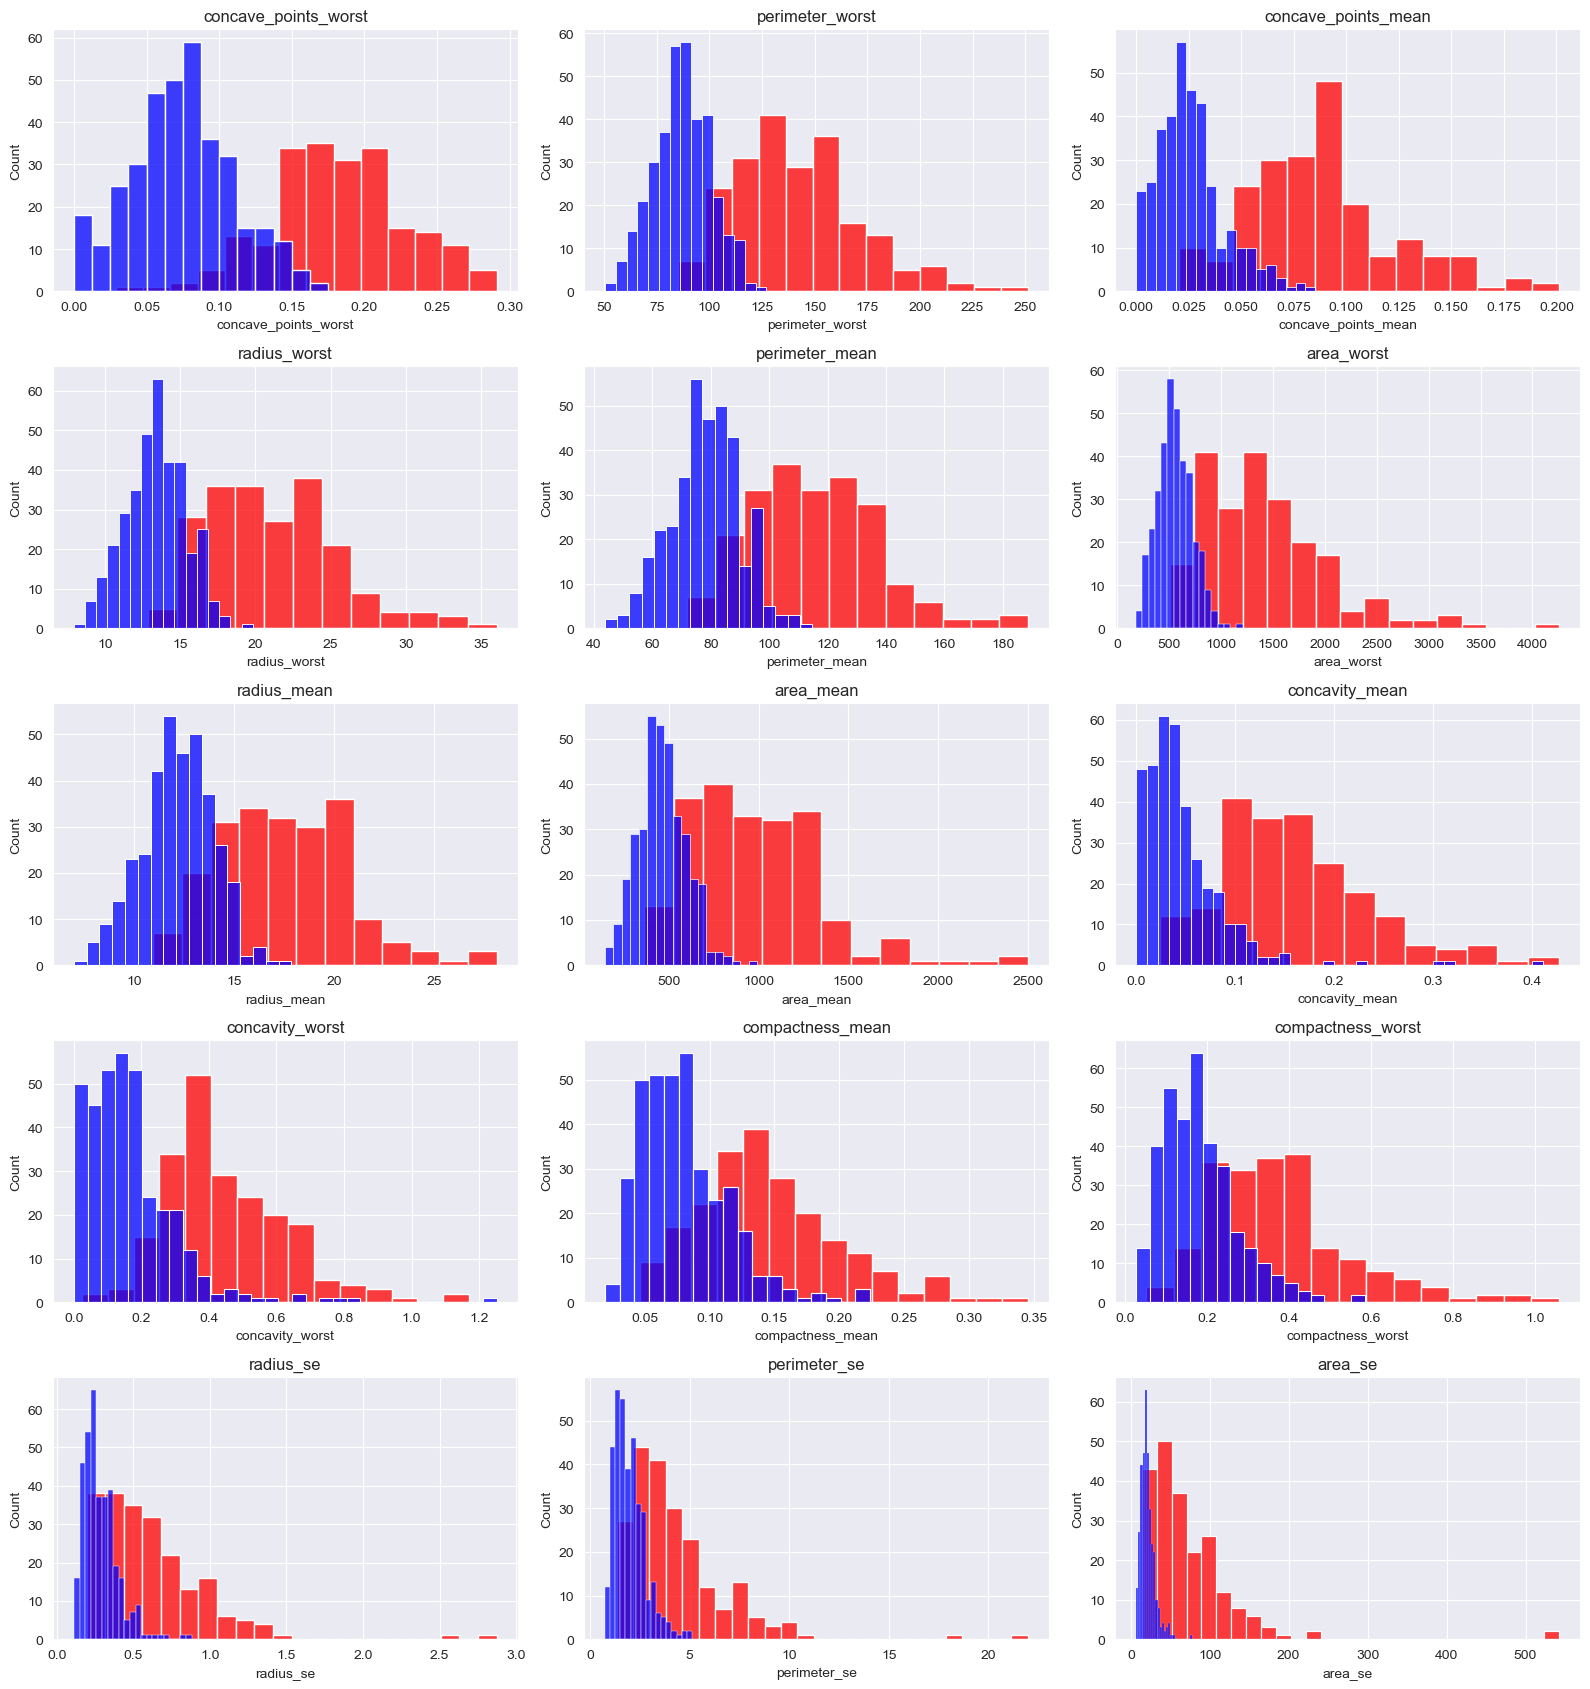

In [16]:
'''
Постройте гистограммы/распределения признаков, при этом используйте целевую переменную,
чтобы сгруппировать и раскрасить гистограммы.
'''

cor = corr_matrix['diagnosis'].sort_values(ascending=False)[1:16]
cor_index = [*cor.index]

nrows = 5
ncols = 3

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 17))

for idx, feature in enumerate(cor_index):
    row = idx // ncols
    col = idx % ncols
    gr1 = sns.histplot(df.query('diagnosis == 1')[feature], kde=False, color='red', ax=axes[row, col])
    gr2 = sns.histplot(df.query('diagnosis == 0')[feature], kde=False, color='blue', ax=axes[row, col])
    axes[row, col].set_title(feature)

if len(cor_index) < nrows * ncols:
    for idx in range(len(cor_index), nrows * ncols):
        row = idx // ncols
        col = idx % ncols
        fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

'''
Постройте heatmap для матрицы корреляций, есть ли признаки, которые сильно скоррелированы? Какие это признаки?
'''
'''
Полная матрица корреляций крупная и не очень информативная,
поэтому построим матрицу самых скореллированных значений с целевой переменной
'''

In [29]:
# Полная матрица корреляций
# sns.set(rc={'figure.figsize': (62, 62)})
# ax = sns.heatmap(corr_matrix[1:5], square=True, annot=True)
# plt.title('Fichure correlation', fontsize=16)

'''
Сильно скоррелированые признаки с целевой переменной > 55%:
concave_points_worst       0.793566
perimeter_worst            0.782914
concave_points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
'''

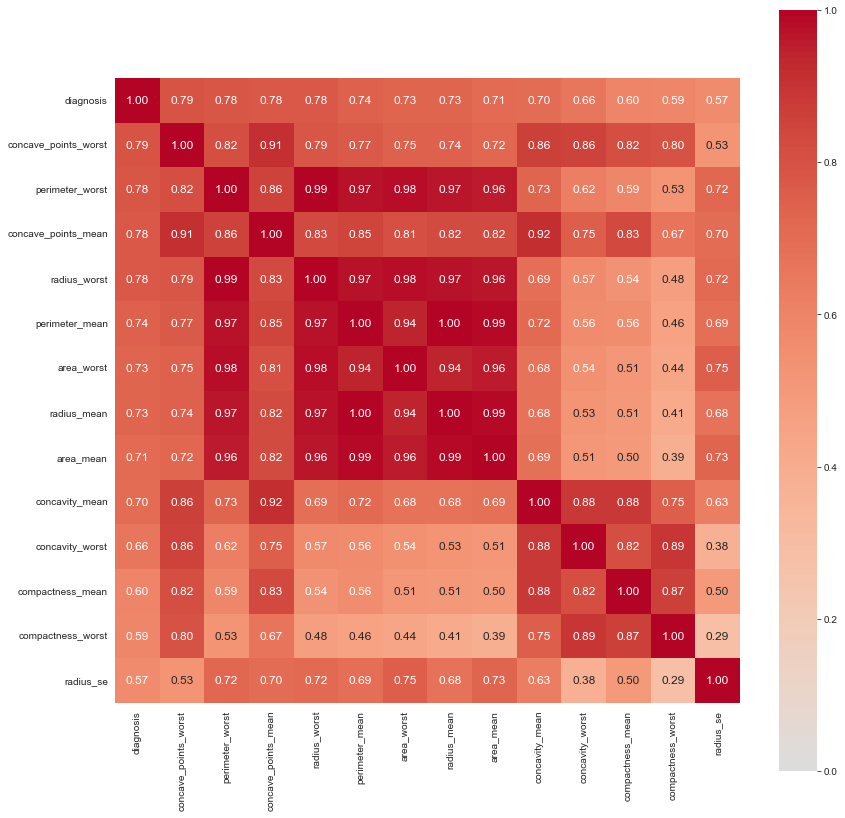

In [9]:
# построим матрицу самых скореллированных значений с целевой переменной
k = 14
cols = corr_matrix.nlargest(k, 'diagnosis')['diagnosis'].index.tolist()
cm = np.corrcoef(df[cols].values.T)
plt.figure(figsize=(14, 14))
# sns.set(font_scale=1.5)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12},
            yticklabels=cols, xticklabels=cols, vmin=0, center=0,
            cmap=sns.color_palette('coolwarm', 1000))
plt.show()

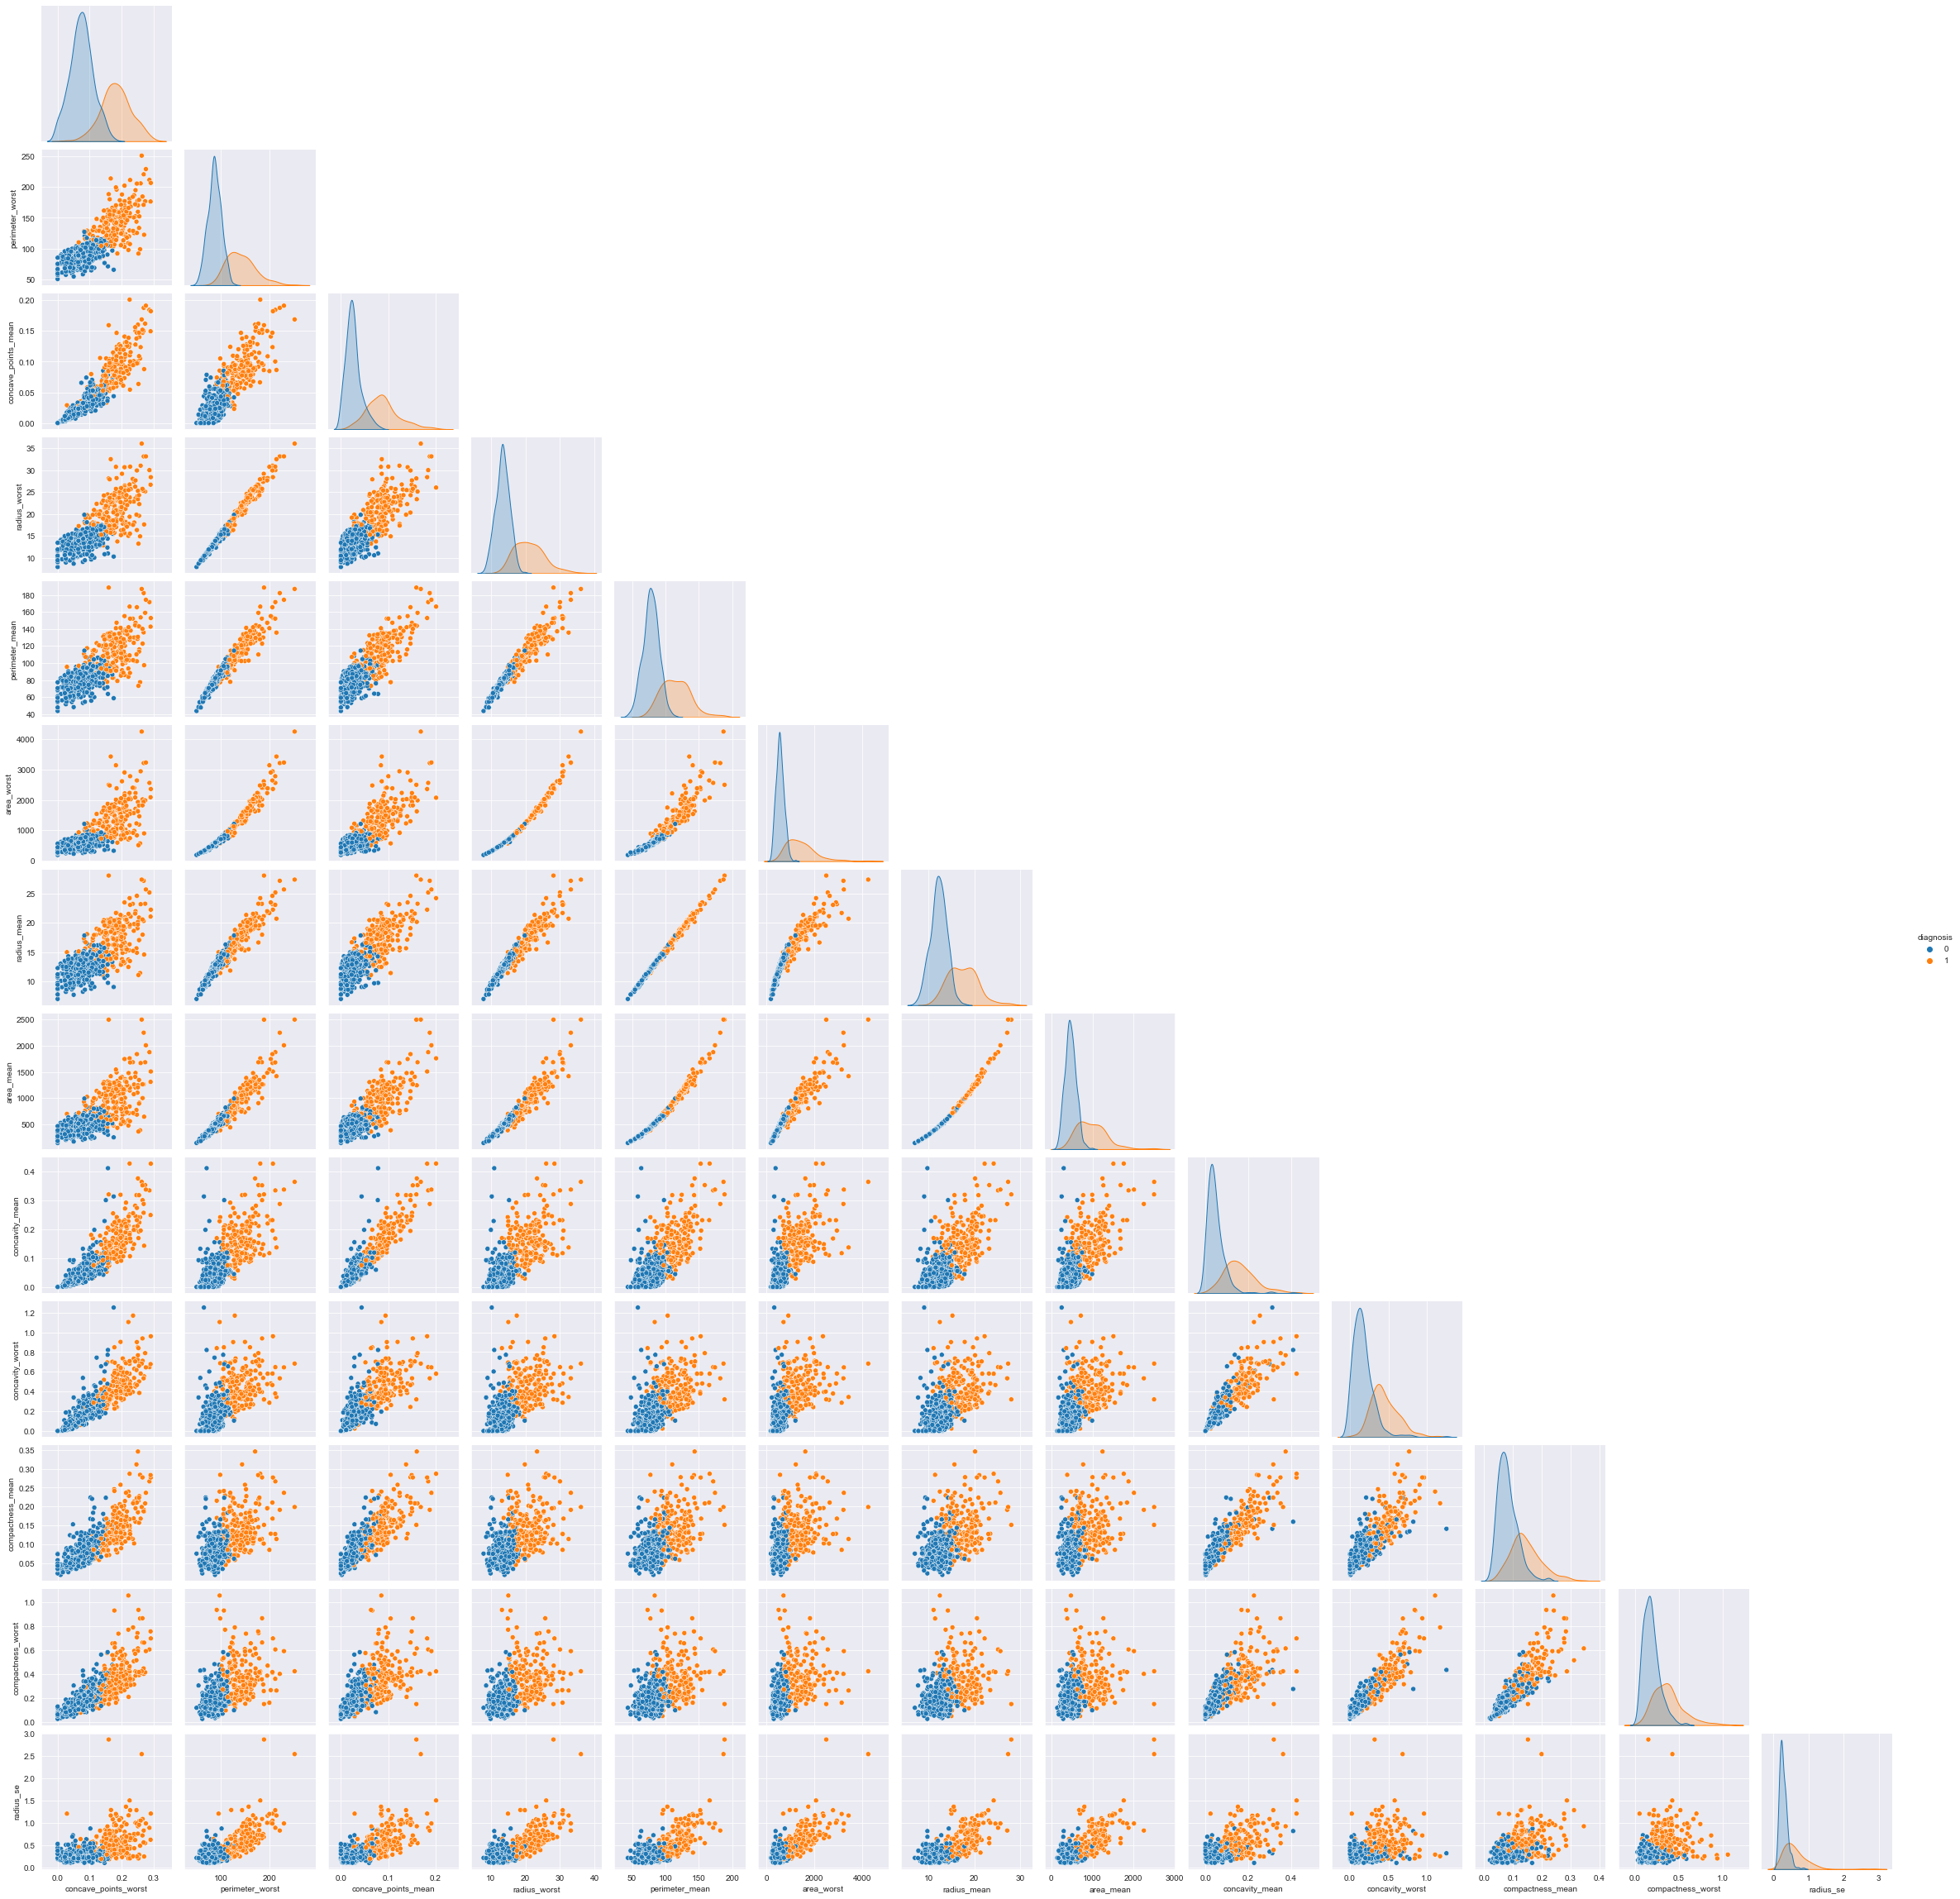

In [10]:
sns.pairplot(df[cols], hue='diagnosis', corner=True)
plt.show()

Наблюдается линейная зависимость по некоторым парамерам. например - perimeter_worst и radius_worst; perimeter_mean и radius_mean;

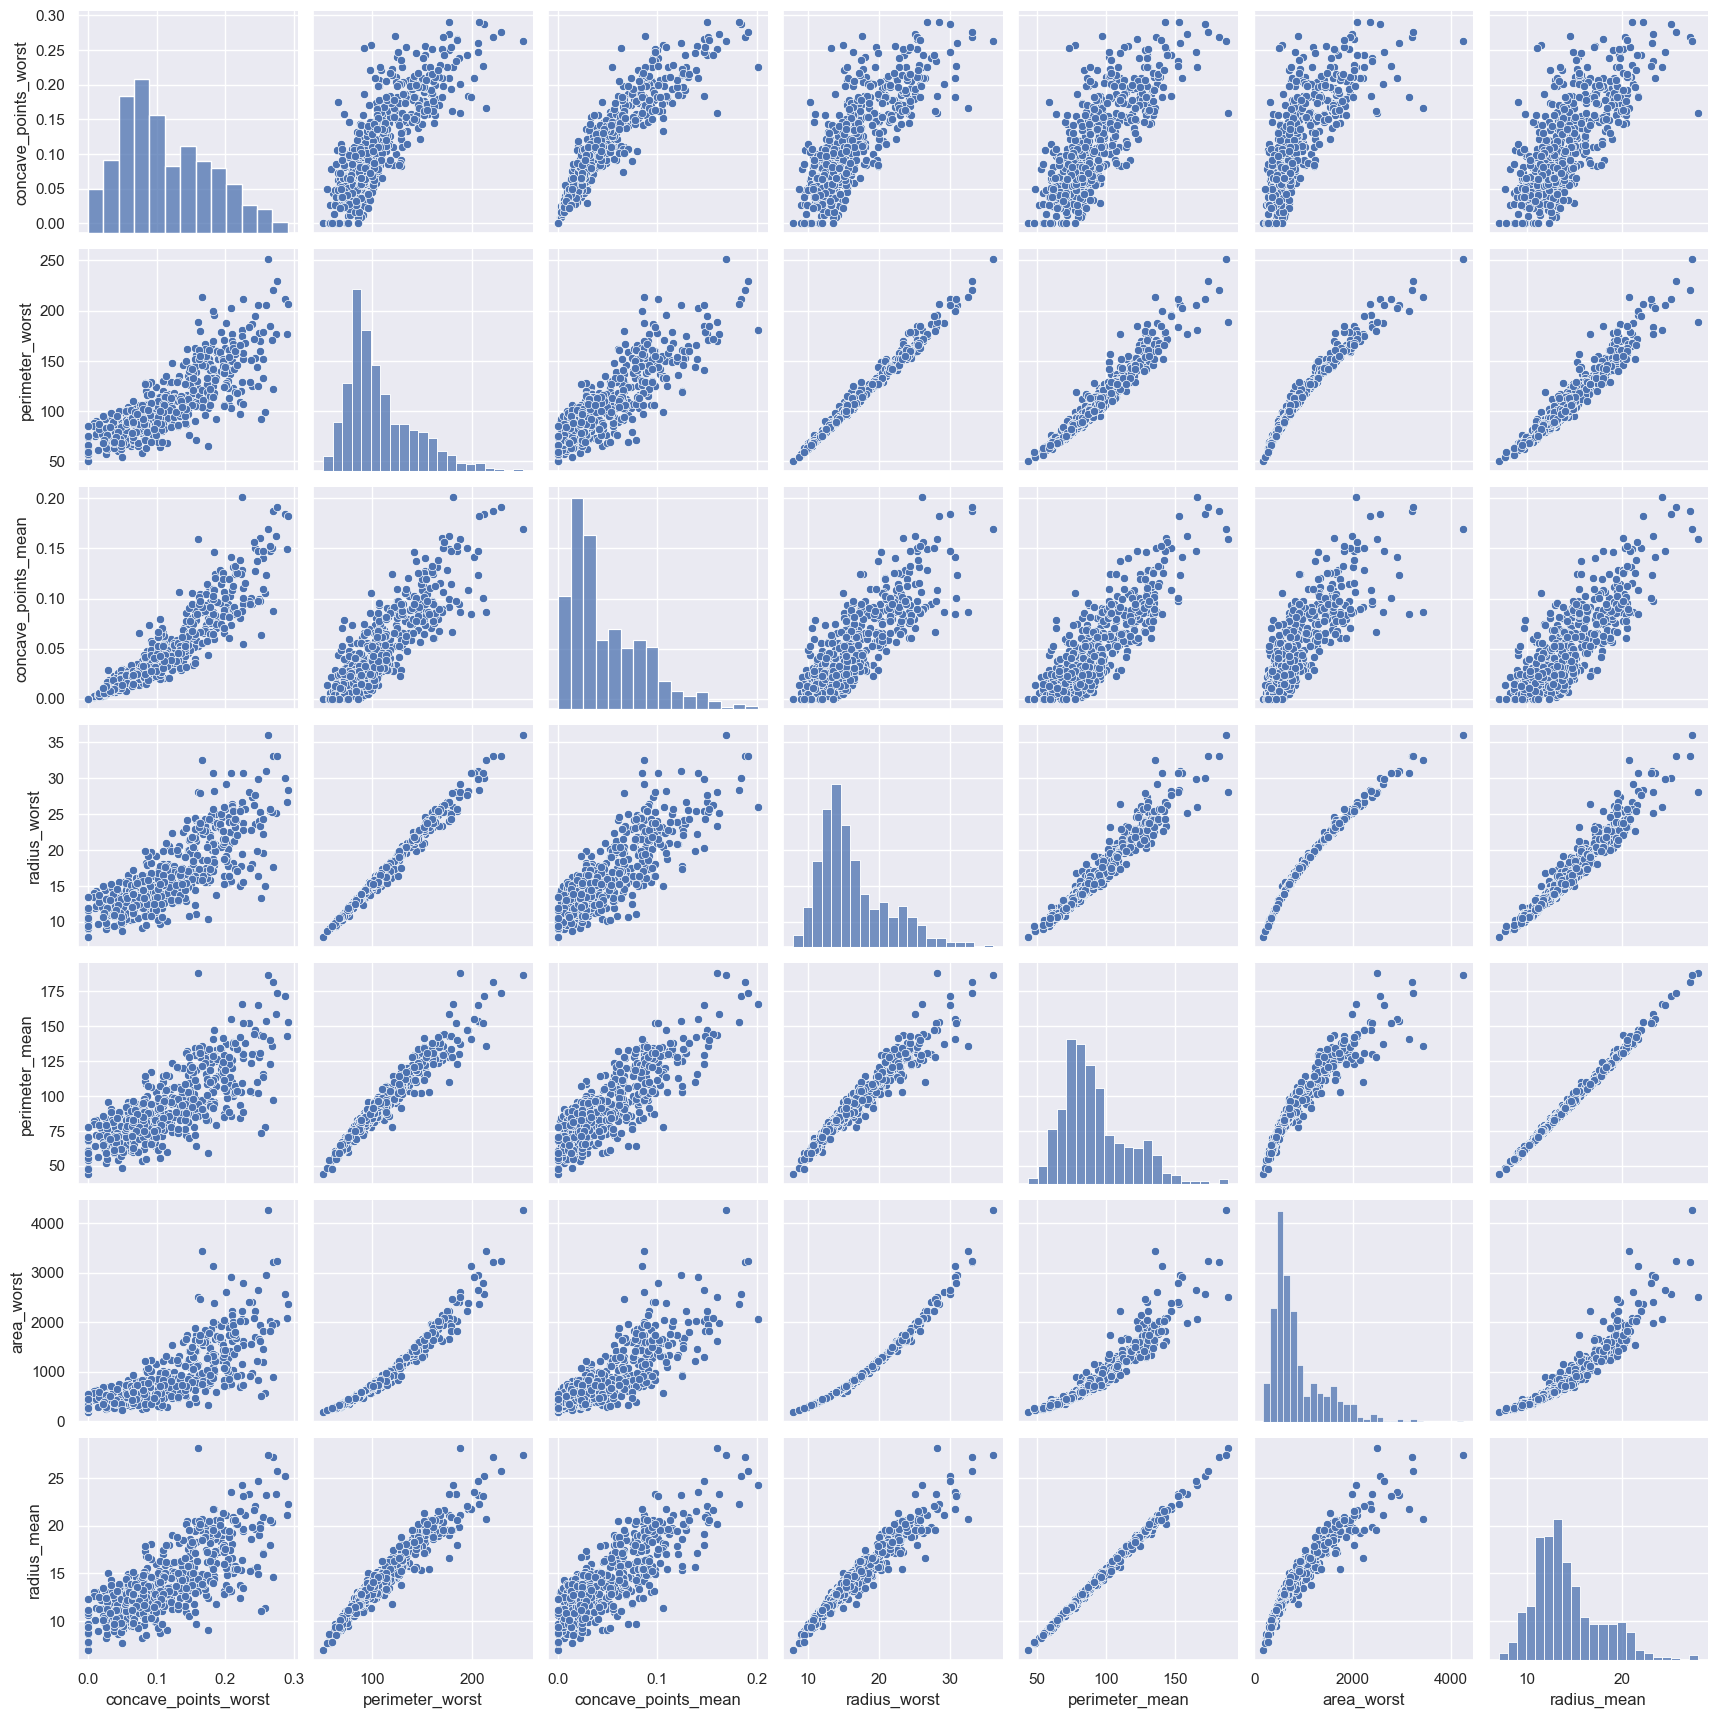

In [30]:
'''
Постройте для сильно скоррелированных признаков попарные scatterplot-ы, действительно ли наблюдается линейная зависимость?
Для примера возьмём 5 самых скоррелированных признаков:
concave_points_worst       0.793566
perimeter_worst            0.782914
concave_points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
'''

# for i in ['concave_points_worst', 'perimeter_worst', 'concave_points_mean', 'radius_worst', 'perimeter_mean']:
#     plt.figure(figsize=(12, 6))
#     plt.tick_params(axis='both', which='major', labelsize=14)
#     plt.xlabel('diagnosis', fontsize=16)
#     plt.ylabel(i, fontsize=16)
#     print(plt.scatter(df.diagnosis, df[i]))
#     plt.show()

cols = ['concave_points_worst', 'perimeter_worst', 'concave_points_mean', 'radius_worst', 'perimeter_mean', 'area_worst', 'radius_mean']
data = df[cols]

sns.pairplot(data, kind="scatter");
# можно наблюдать ярко выраженную линейную зависимость

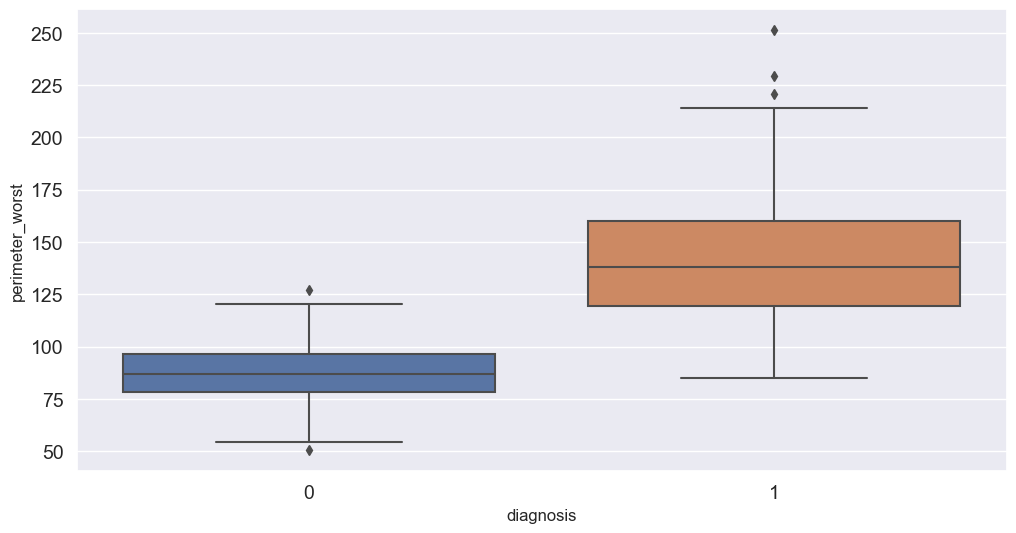

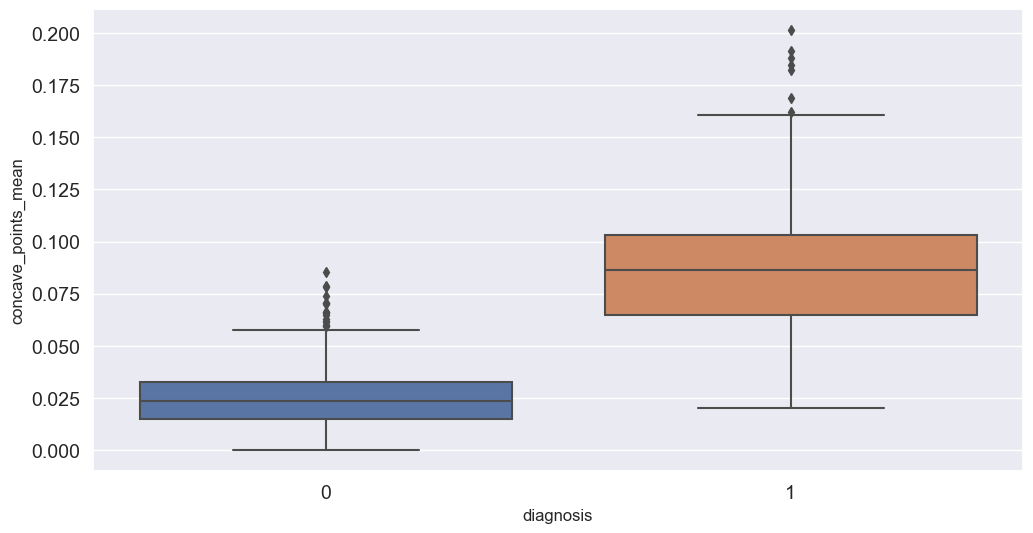

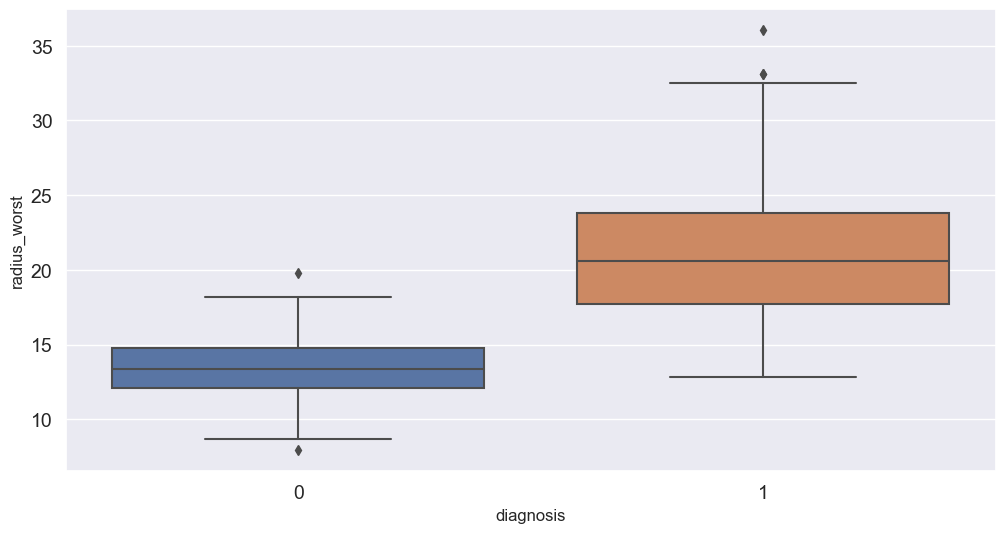

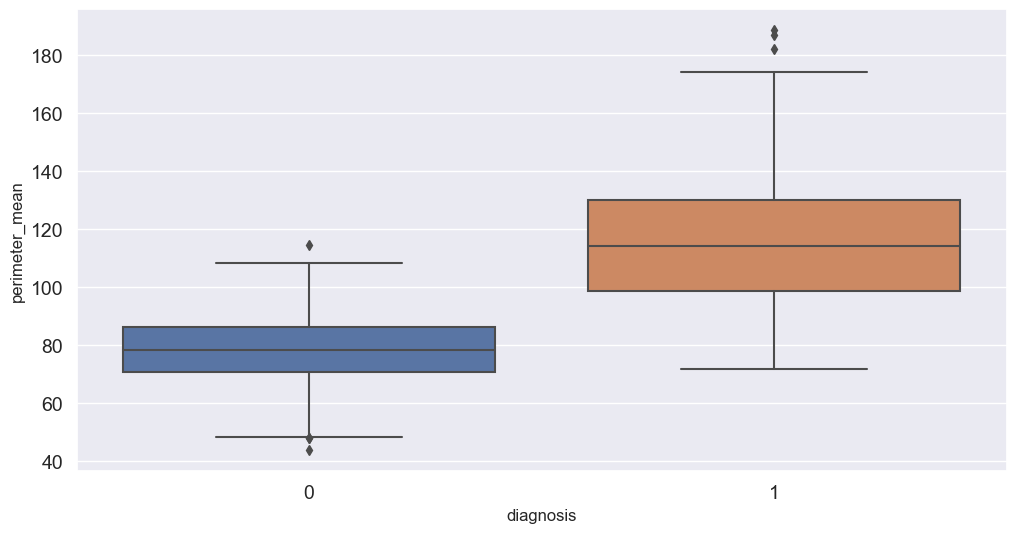

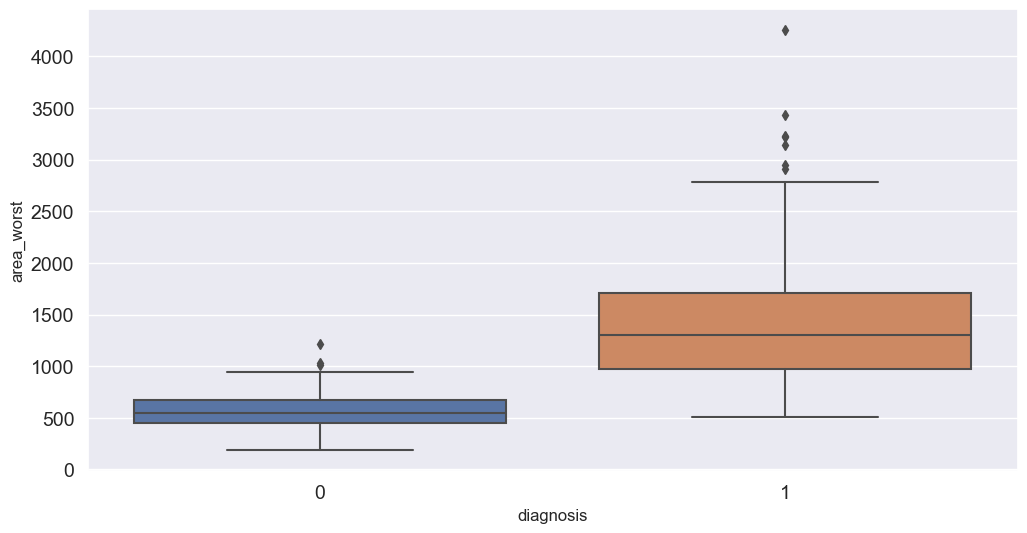

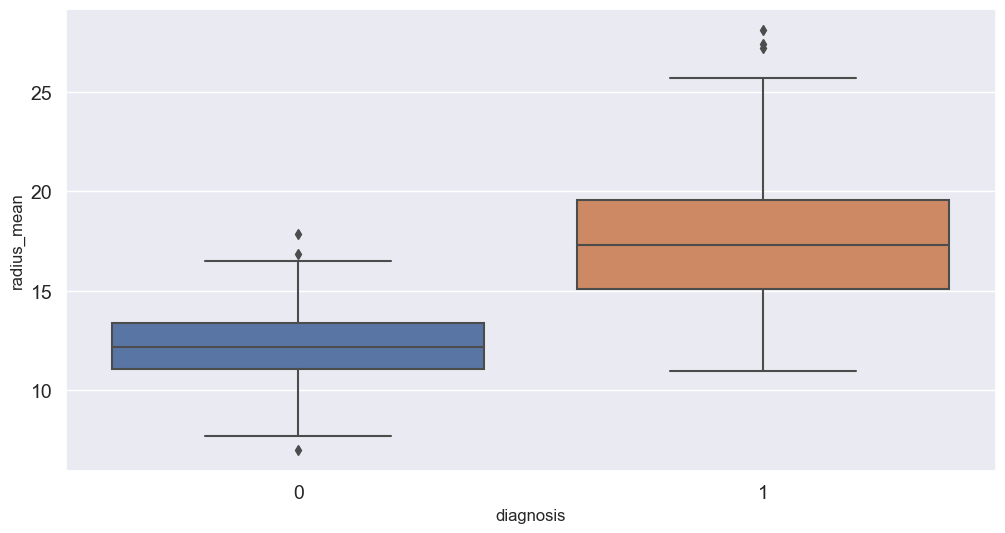

In [31]:
'''
Используя boxplots и группировку по целевой переменной, попробуйте предположить,
по каким признакам наиболее удобно было бы отделить злокачественные новообразования от доброкачественных.

По boxplot-ам явно видно, что сильноскореллированные признаки указывают на то, что они удобнее для выявления злокачественных
новообразований.
'''

for i in cols[1:7]:
    plt.figure(figsize=(12, 6))
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.xlabel('diagnosis', fontsize=12)
    plt.ylabel(i, fontsize=12)
    sns.boxplot(data=df, x='diagnosis', y=i)
#     plt.show()

# Часть 2. Моделирование при помощи kNN


    - Моделирование при помощи kNN Разбейте данные на train-test, отложив 30% выборки для тестирования.
    - Приведите все непрерывные переменные к одному масштабу при помощи стандартизации.
    - Кратко поясните, почему стандартизация здесь нужна. Постройте модель kNN "из коробки" без настройки параметров.
    - Оцените метрики качества бинарной классификации (accuracy, precision, recall, f1_score),
        постройте ROC-кривую и посчитайте площадь под ней.
    - Теперь проведите настройку параметра числа соседей на кросс-валидации.
        Снова оцените результаты, стало ли лучше? :)


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.model_selection import cross_val_score

In [34]:
df['diagnosis'].mean()  #0.3725

0.37258347978910367

Разбейте данные на train-test, отложив 30% выборки для тестирования.

In [35]:
X_train, X_test = train_test_split(df.drop(columns="diagnosis"),
                                   test_size=0.3, random_state=42,
                                   stratify=df['diagnosis'])

In [36]:
Y_train, Y_test = train_test_split(df['diagnosis'], test_size=0.3, random_state=42, stratify=df['diagnosis'])

In [43]:
#  - Приведите все непрерывные переменные к одному масштабу при помощи стандартизации.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

- Кратко поясните, почему стандартизация здесь нужна.
Стандартизация необходима для приведения всех признаков к единому масштабу, т.к. судя по данным они представлены в разных масштабах.

In [44]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((398, 30), (171, 30), (398,), (171,))

Постройте модель kNN "из коробки" без настройки параметров.

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, Y_train)


def quality(prediction, true):
    accuracy = accuracy_score(prediction, true)
    precision = precision_score(prediction, true)
    recall = recall_score(prediction, true)
    f1 = f1_score(prediction, true)
    print(
        f"Accuracy: {round(accuracy, 3)} \nPrecision: {round(precision, 3)} \nRecall:  {round(recall, 3)} \nF1-score:  {round(f1, 3)}")


print("Train quality:")
quality(knn.predict(X_train_scaled), Y_train)
print()
print("Test quality:")
quality(knn.predict(X_test_scaled), Y_test)

Train quality:
Accuracy: 0.972 
Precision: 0.932 
Recall:  0.993 
F1-score:  0.962

Test quality:
Accuracy: 0.965 
Precision: 0.906 
Recall:  1.0 
F1-score:  0.951


In [ ]:
# Оцените метрики качества бинарной классификации (accuracy, precision, recall, f1_score)
neighbors = range(1, 10)
accuracy_score_train = []
accuracy_score_test = []
precision_score_train = []
precision_score_test = []
recall_score_train = []
recall_score_test = []
f1_score_train = []
f1_score_test = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, Y_train)
    f1_score_train.append(f1_score(knn.predict(X_train_scaled), Y_train))
    f1_score_test.append(f1_score(knn.predict(X_test_scaled), Y_test))
    accuracy_score_train.append(accuracy_score(knn.predict(X_train_scaled), Y_train))
    accuracy_score_test.append(accuracy_score(knn.predict(X_test_scaled), Y_test))
    recall_score_train.append(recall_score(knn.predict(X_train_scaled), Y_train))
    recall_score_test.append(recall_score(knn.predict(X_test_scaled), Y_test))
    precision_score_train.append(precision_score(knn.predict(X_train_scaled), Y_train))
    precision_score_test.append(precision_score(knn.predict(X_test_scaled), Y_test))

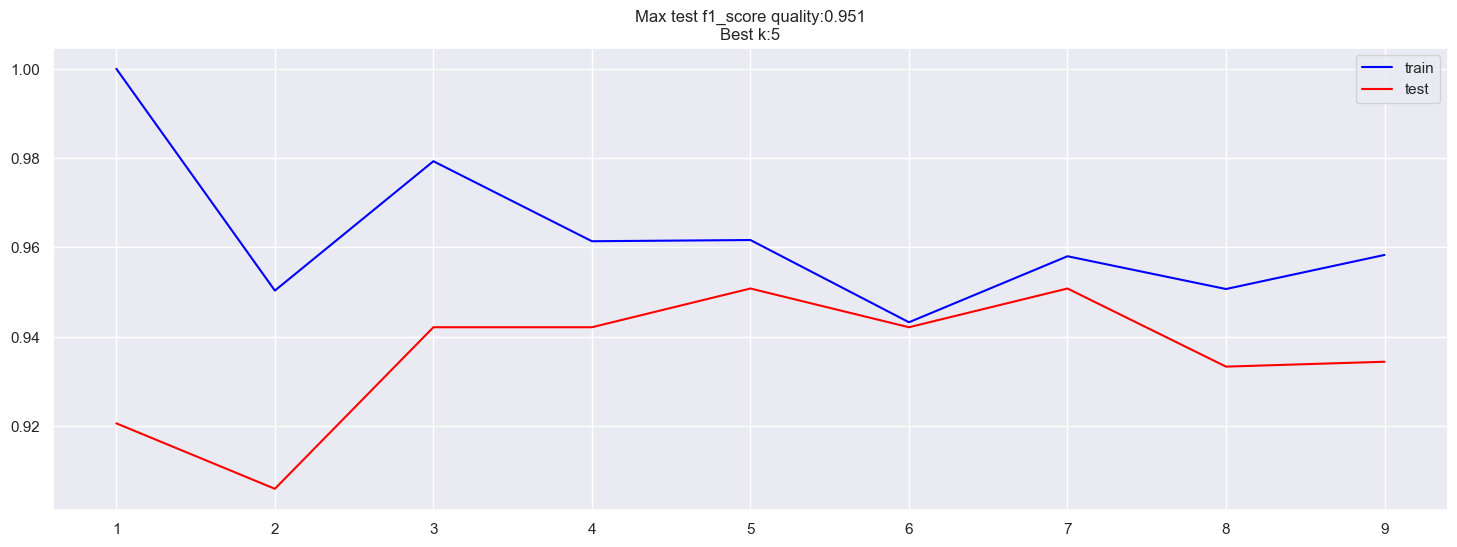

In [69]:
plt.figure(figsize=(18, 6))
plt.plot(neighbors, f1_score_train, color='blue', label='train')
plt.plot(neighbors, f1_score_test, color='red', label='test')
plt.title(f'Max test f1_score quality:{round(max(f1_score_test), 3)}\nBest k:{np.argmax(f1_score_test) + 1}')
plt.grid(True)
plt.legend()

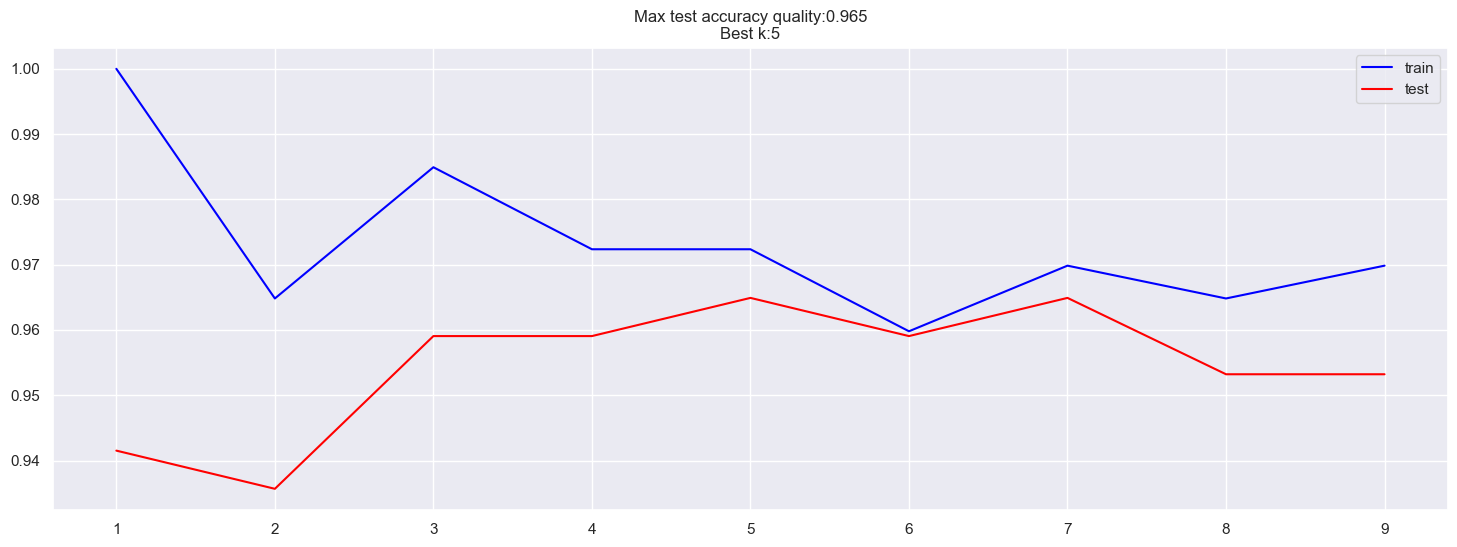

In [70]:
plt.figure(figsize=(18, 6))
plt.plot(neighbors, accuracy_score_train, color='blue', label='train')
plt.plot(neighbors, accuracy_score_test, color='red', label='test')
plt.title(f'Max test accuracy quality:{round(max(accuracy_score_test), 3)}\nBest k:{np.argmax(accuracy_score_test) + 1}')
plt.grid(True)
plt.legend()

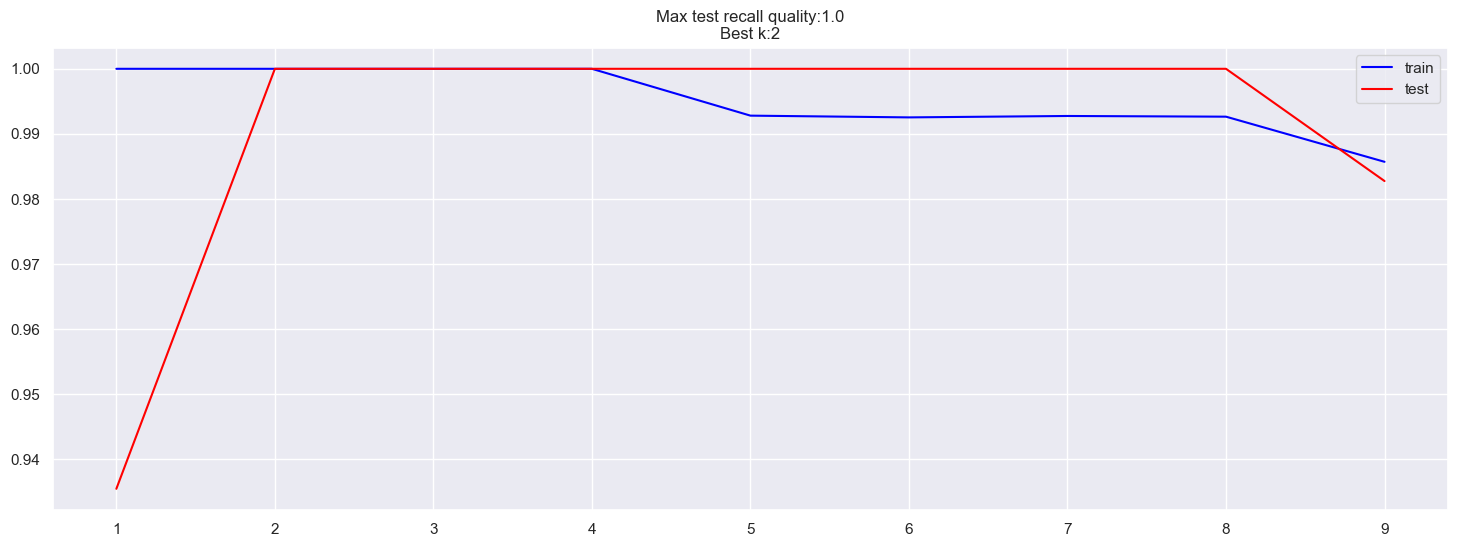

In [71]:
plt.figure(figsize=(18, 6))
plt.plot(neighbors, recall_score_train, color='blue', label='train')
plt.plot(neighbors, recall_score_test, color='red', label='test')
plt.title(f'Max test recall quality:{round(max(recall_score_test), 3)}\nBest k:{np.argmax(recall_score_test) + 1}')
plt.grid(True)
plt.legend()

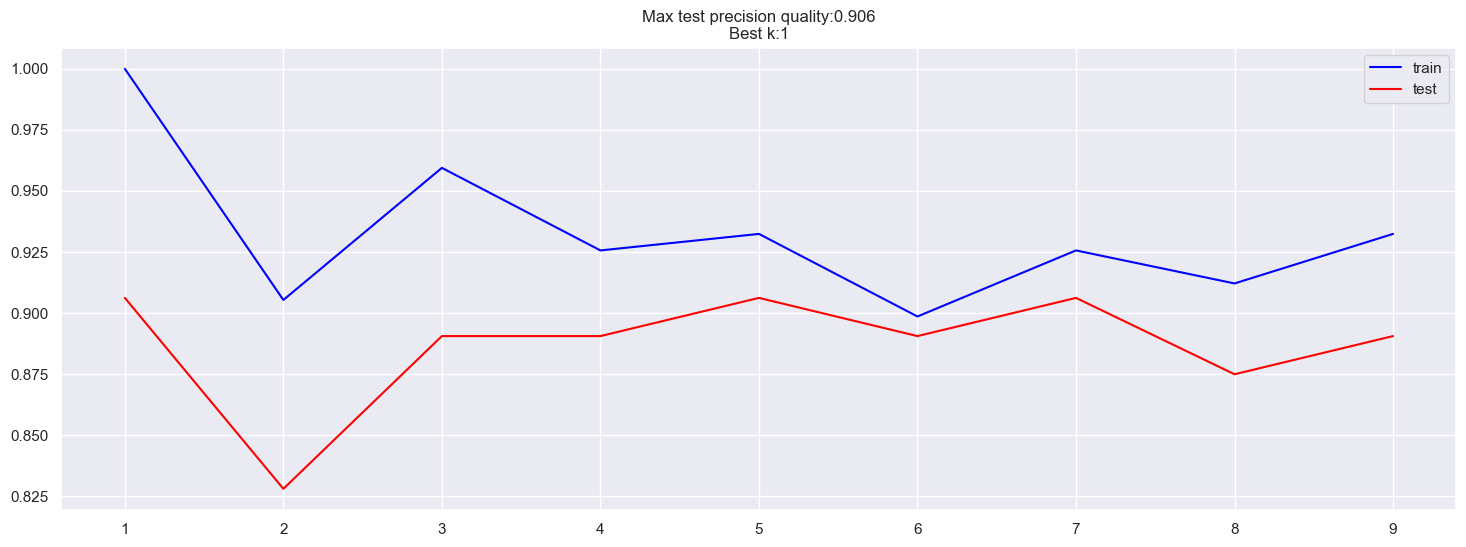

In [72]:
plt.figure(figsize=(18, 6))
plt.plot(neighbors, precision_score_train, color='blue', label='train')
plt.plot(neighbors, precision_score_test, color='red', label='test')
plt.title(f'Max test precision quality:{round(max(precision_score_test), 3)}\nBest k:{np.argmax(precision_score_test) + 1}')
plt.grid(True)
plt.legend()

ROC-AUC =  0.953


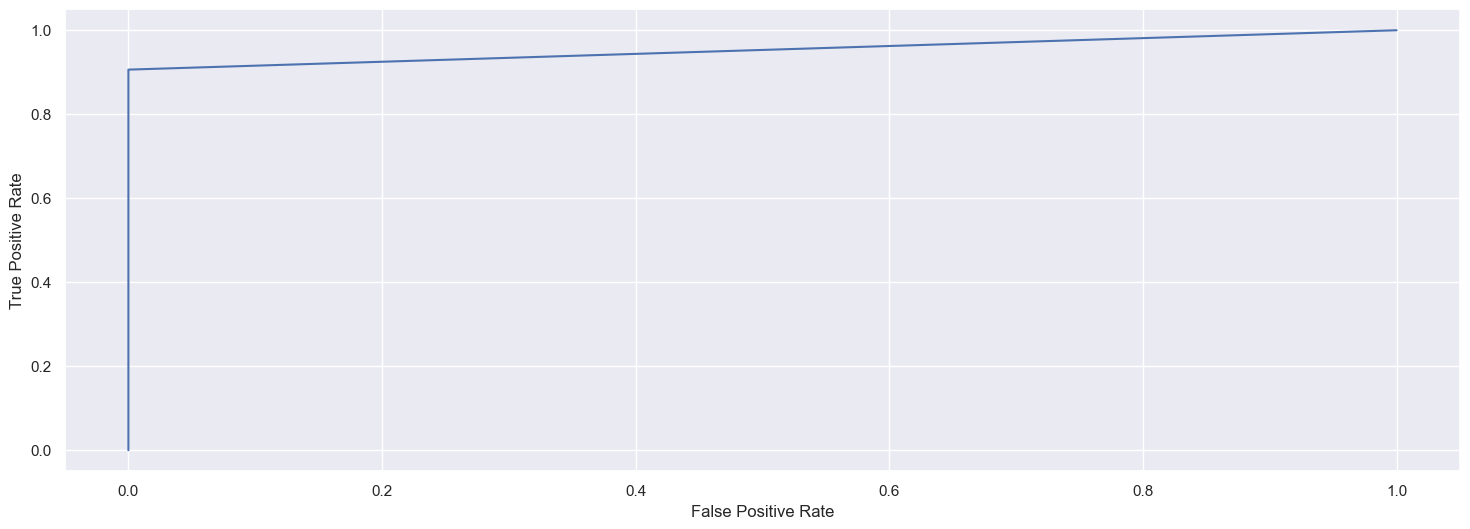

In [60]:
# постройте ROC-кривую и посчитайте площадь под ней
plt.figure(figsize=(18, 6))
from sklearn.metrics import  roc_auc_score
from sklearn import metrics

knn.fit(X_train_scaled, Y_train)
predict = knn.predict(X_test_scaled)

precision_positive = metrics.precision_score(Y_test, predict, pos_label=1)
precision_negative = metrics.precision_score(Y_test, predict, pos_label=0)
recall_sensitivity = metrics.recall_score(Y_test, predict, pos_label=1)
recall_specificity = metrics.recall_score(Y_test, predict, pos_label=0)
auc = metrics.roc_auc_score(Y_test, knn.predict(X_test_scaled))
fpr, tpr, _ = metrics.roc_curve(Y_test, predict)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr, tpr)
plt.grid(True)

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, Y_train)
print('ROC-AUC = ', round(roc_auc_score(Y_test, knn.predict(X_test_scaled)), 3))

Теперь проведите настройку параметра числа соседей на кросс-валидации. 
        Снова оцените результаты, стало ли лучше? :)

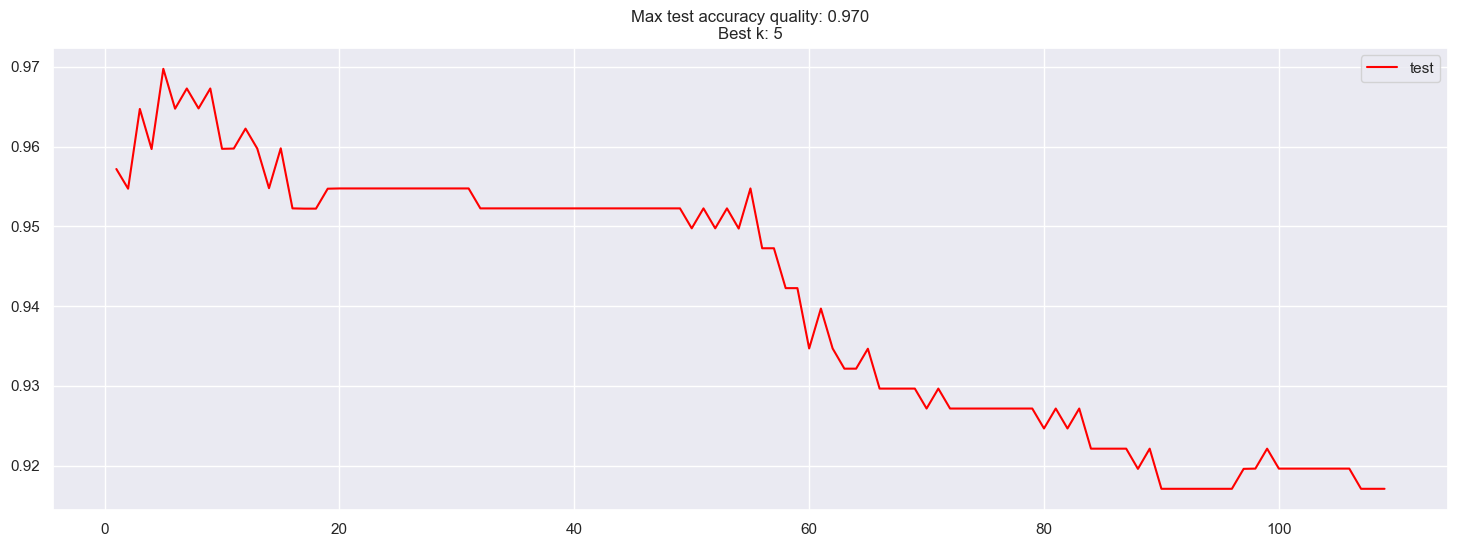

In [73]:
from sklearn.model_selection import cross_val_score

neighbors = range(1, 110)
accuracy_train = []
accuracy_test = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, Y_train, cv=5, scoring='accuracy')
    #accuracy_train.append(accuracy_score(knn.predict(X_train), y_train))
    accuracy_test.append(scores.mean())

plt.figure(figsize=(18, 6))
plt.plot(neighbors, accuracy_test, color='red', label='test')
plt.title("Max test accuracy quality: {:.3f}\nBest k: {}".format(max(accuracy_test), np.argmax(accuracy_test) + 1))
plt.legend()
plt.grid(True)
plt.show()

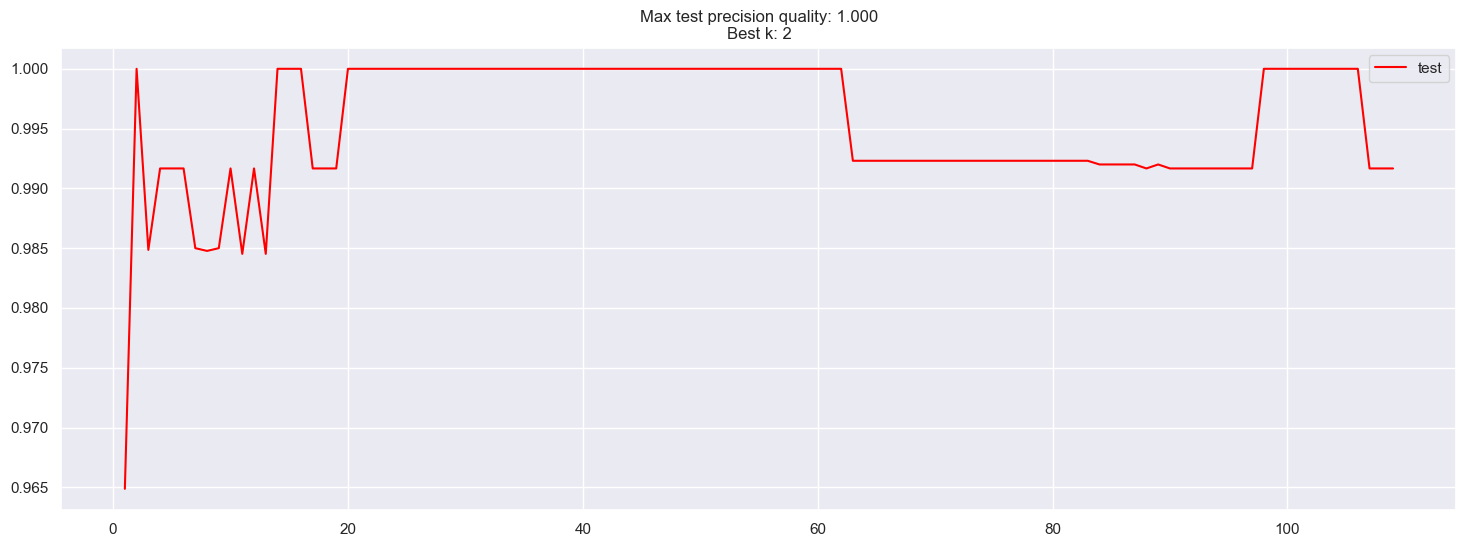

In [74]:
from sklearn.model_selection import cross_val_score

neighbors = range(1, 110)
precision_test = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, Y_train, cv=5, scoring='precision')
    #accuracy_train.append(accuracy_score(knn.predict(X_train), y_train))
    precision_test.append(scores.mean())

plt.figure(figsize=(18, 6))
plt.plot(neighbors, precision_test, color='red', label='test')
plt.title("Max test precision quality: {:.3f}\nBest k: {}".format(max(precision_test), np.argmax(precision_test) + 1))
plt.legend()
plt.grid(True)
plt.show()

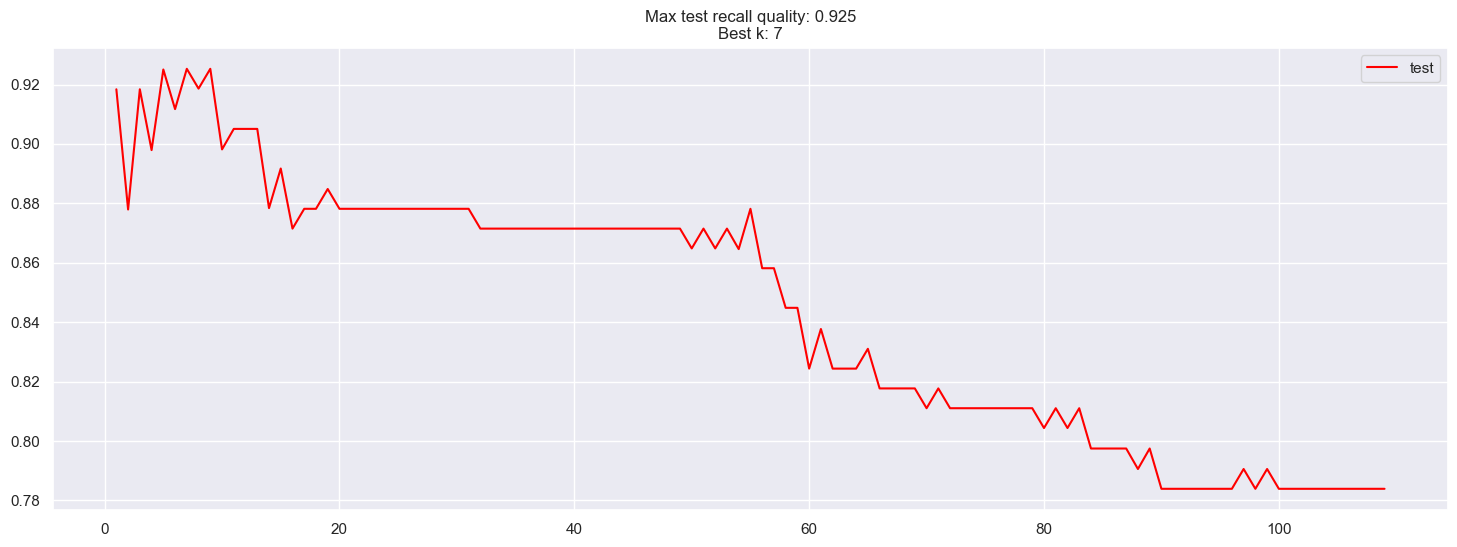

In [75]:
from sklearn.model_selection import cross_val_score

neighbors = range(1, 110)
recall_test = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, Y_train, cv=5, scoring='recall')
    #accuracy_train.append(accuracy_score(knn.predict(X_train), y_train))
    recall_test.append(scores.mean())

plt.figure(figsize=(18, 6))
plt.plot(neighbors, recall_test, color='red', label='test')
plt.title("Max test recall quality: {:.3f}\nBest k: {}".format(max(recall_test), np.argmax(recall_test) + 1))
plt.legend()
plt.grid(True)
plt.show()

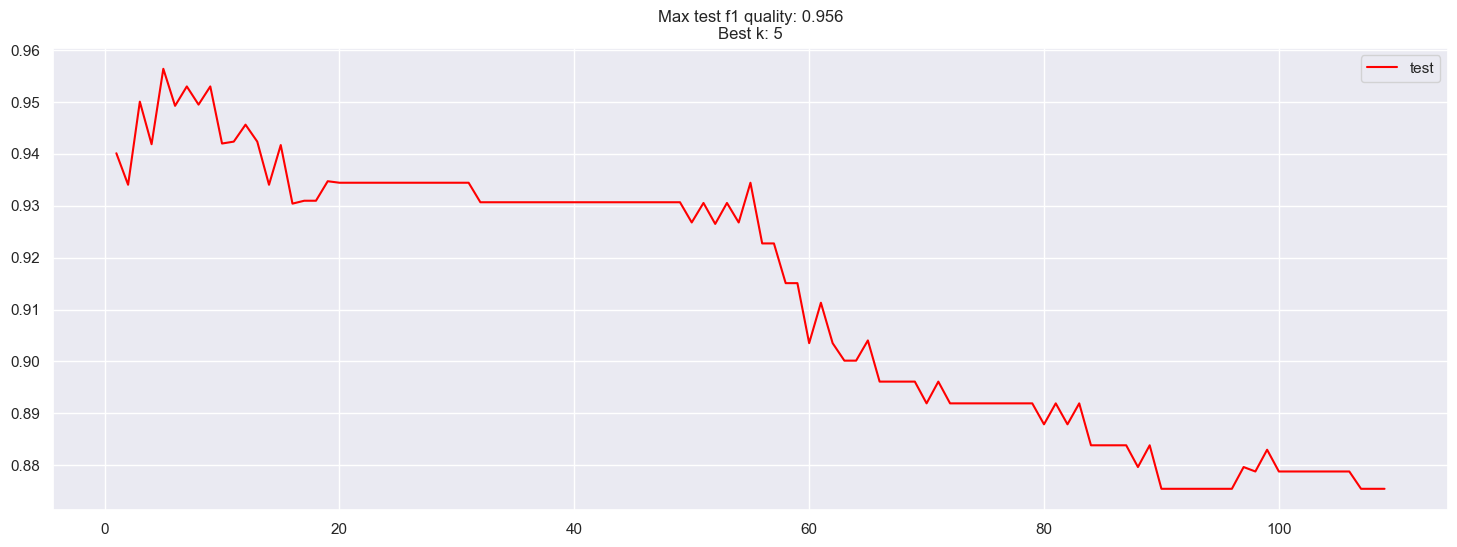

In [76]:
from sklearn.model_selection import cross_val_score

neighbors = range(1, 110)
f1_test = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, Y_train, cv=5, scoring='f1')
    #accuracy_train.append(accuracy_score(knn.predict(X_train), y_train))
    f1_test.append(scores.mean())

plt.figure(figsize=(18, 6))
plt.plot(neighbors, f1_test, color='red', label='test')
plt.title("Max test f1 quality: {:.3f}\nBest k: {}".format(max(f1_test), np.argmax(f1_test) + 1))
plt.legend()
plt.grid(True)
plt.show()

Видно, что accuracy с числом соседей 5 показывает лучший результат.

In [65]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': range(1, 50),
    'p': range(1, 4)
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1', verbose=1)
grid_search.fit(X_train_scaled, Y_train)

print("Best CV score: {:.3f}, best CV k: {}".format(
    grid_search.best_score_, grid_search.best_estimator_.n_neighbors)
)

test_predictions = grid_search.best_estimator_.predict(X_test_scaled)
print("Resulting test score: {:.3f}".format(f1_score(test_predictions, Y_test)))

Fitting 5 folds for each of 147 candidates, totalling 735 fits
Best CV score: 0.960, best CV k: 5
Resulting test score: 0.959


 Как можно наблюдать, дефолтное значение 5 в KNeighborsClassifier оказалось оптимальным. Отклонение результатов составляет тысячные доли.